# Основные понятия в статистике

## Среднее
Пусть имеется спиок элементов $x_0, x_1, x_2, ... x_n$. Тогда среднее будет вычисяться по формуле $$\mu = \frac{\sum^{n}_{i=0} x_i}{n}$$

In [1]:
import pandas as pd

In [2]:
sr = pd.Series([1, 4, 6, 3, 4, 1, 3, 8, 4, 6, 3, 5, 6, 7, 8])

In [3]:
print(sum(sr) / len(sr))
print(sr.mean())

4.6
4.6


## Медиана
Возьмём тот же спискок, отсортируем его и возьмём элемент из середины $$Me = x_\frac{n}{2}$$
А что делать, если длина списка чётная? Тогда вычислим среднее от левого и правого эдемента, стоящих посередине. $$Me = \frac{x_\frac{n-2}{2} + x_\frac{n}{2}}{2}$$ 

In [4]:
print(sorted(sr)[len(sr) // 2], 
      sr.median(), sep='\t')
sr[16] = 7
print((sorted(sr)[len(sr) // 2 - 1] + sorted(sr)[len(sr) // 2]) / 2, 
      sr.median(), sep='\t')

4	4.0
4.5	4.5


## Дисперсия 
Для анализа отклонение значений от среднего, придумали следующую формулу $$ \sigma^2 = \frac{\sum_{i=0}^{n} (x_i - \mu) ^ 2}{n}$$

In [5]:
print(sum((x - sr.mean()) ** 2 for x in sr) / len(sr))
print(sr.var(ddof=0))

4.6875
4.6875


## Стандартное отклонение
Просто квадратный корень от дисперсии $$ \sigma = \sqrt{\sigma^2} = \sqrt{\frac{\sum_{i=0}^{n} (x_i - \mu) ^ 2}{n}} $$

In [6]:
print((sum((x - sr.mean()) ** 2 for x in sr) / len(sr)) ** 0.5)
print(sr.std(ddof=0))

2.165063509461097
2.165063509461097


## Золотое правило "трёх сигм"
Правило трех сигм заключается в том, что при нормальном распределении практически все значения величины с вероятностью 0.997 лежат не далее трех сигм в любую сторону от математического ожидания, то есть находятся в диапазоне $[\mu - 3\sigma, \mu + 3\sigma]$ $$ \mu \pm \sigma \approx 0.683$$ $$\mu \pm 2\sigma \approx 0.954$$ $$\mu \pm 3\sigma \approx 0.997$$

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(11.7,8.27)})
np.random.seed(10)

In [8]:
mu, sigma, size = 0, 0.1, 500
s = np.random.normal(mu, sigma, size)

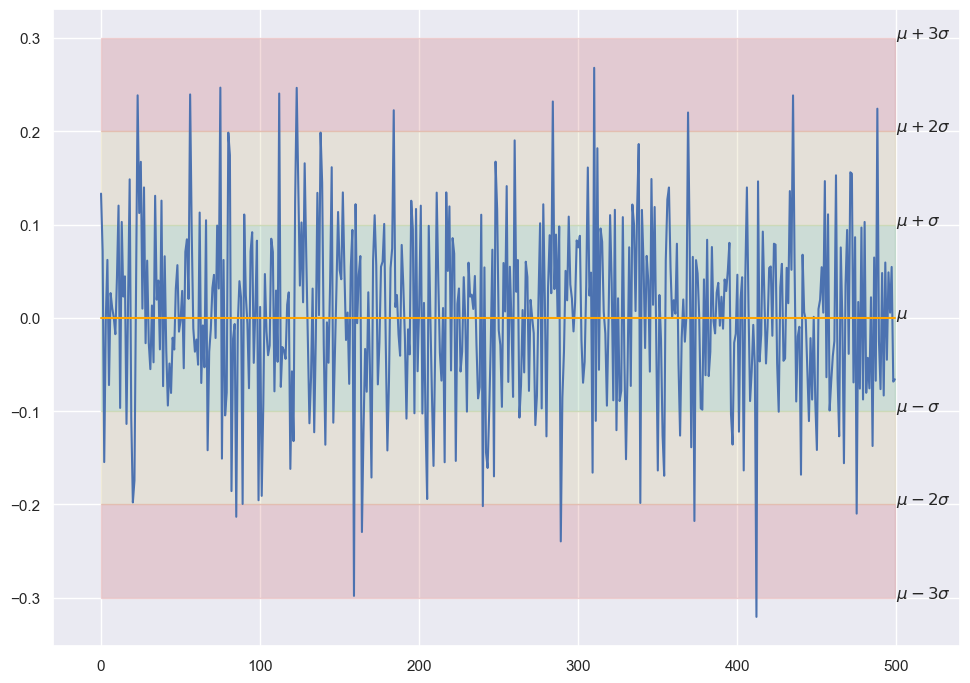

In [9]:
x = np.arange(size)
ax = sns.lineplot(s)
plt.xlim([-30, size * 1.08])

ax.text(size, mu, '$\mu$')
sns.lineplot([mu] * size, color='orange', ax=ax)

ax.text(size, mu - sigma, '$\mu - \sigma$')
ax.text(size, mu + sigma, '$\mu + \sigma$')
ax.fill_between(x=np.arange(size), y1=mu - sigma, y2=mu + sigma, alpha=0.2, color='g')

ax.text(size, mu - 2 * sigma, '$\mu - 2\sigma$')
ax.text(size, mu + 2 * sigma, '$\mu + 2\sigma$')
ax.fill_between(x=np.arange(size), y1=mu - 2 * sigma, y2=mu - sigma, alpha=0.2, color='y')
ax.fill_between(x=np.arange(size), y1=mu + sigma, y2=mu + 2 * sigma, alpha=0.2, color='y')

ax.text(size, mu - 3 * sigma, '$\mu - 3\sigma$')
ax.text(size, mu + 3 * sigma, '$\mu + 3\sigma$')
ax.fill_between(x=np.arange(size), y1=mu - 3 * sigma, y2=mu - 2 * sigma, alpha=0.2, color='r')
ax.fill_between(x=np.arange(size), y1=mu + 2 * sigma, y2=mu + 3 * sigma, alpha=0.2, color='r');

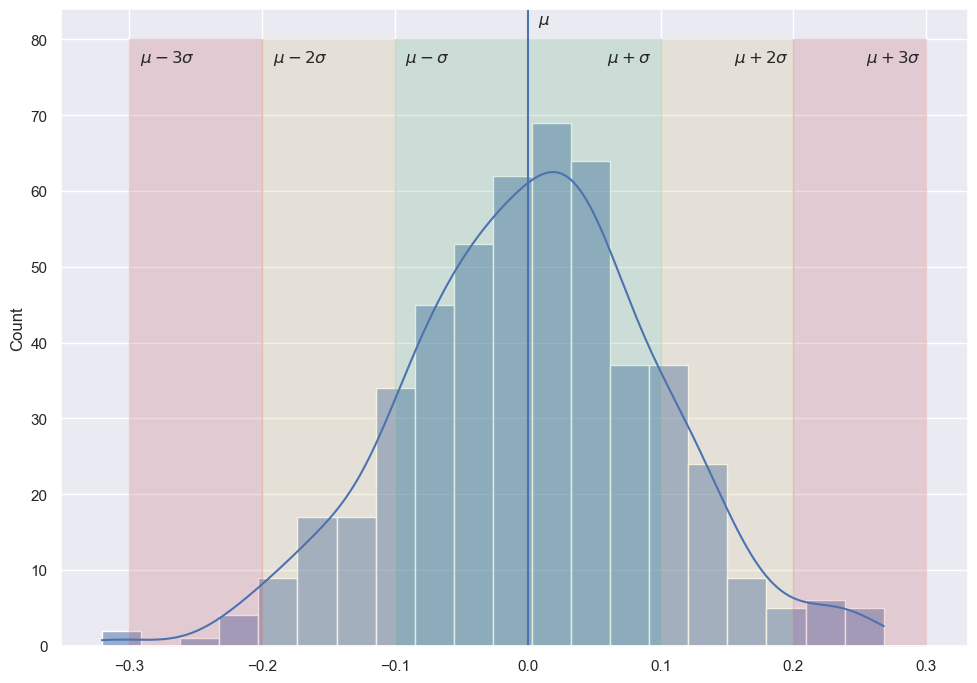

In [10]:
shift = 0.008
back_shift = 0.04 + 0.005
ax = sns.histplot(s, kde=True)
ax.text(mu + shift, 82, '$\mu$')
ax.axvline(mu)

ax.text(mu - sigma + shift, 77, '$\mu - \sigma$')
ax.text(mu + sigma - back_shift + 0.005, 77, '$\mu + \sigma$')
ax.fill_between(x=[mu + sigma, mu - sigma], y1=0, y2=80, alpha=0.2, color='g')

ax.text(mu - 2 * sigma + shift, 77, '$\mu - 2\sigma$')
ax.text(mu + 2 * sigma - back_shift, 77, '$\mu + 2\sigma$')
ax.fill_between(x=[mu - 2 * sigma, mu - 1 * sigma], y1=0, y2=80, alpha=0.2, color='y')
ax.fill_between(x=[mu + sigma, mu + 2 * sigma], y1=0, y2=80, alpha=0.2, color='y')

ax.text(mu - 3 * sigma + shift, 77, '$\mu - 3\sigma$')
ax.text(mu + 3 * sigma - back_shift, 77, '$\mu + 3\sigma$')

ax.fill_between(x=[mu - 3 * sigma, mu - 2 * sigma], y1=0, y2=80, alpha=0.2, color='r')
ax.fill_between(x=[mu + 2 * sigma , mu + 3 * sigma], y1=0, y2=80, alpha=0.2, color='r');

# Взаимосвязь факторов друг с другом

[![](https://mermaid.ink/img/pako:eNqlVM1qE1EUfpXLhZAUko3LAZVoqm21daG4kNmMmYkJJjNhOoPIEGjHopVWu3FV_EGk-yF0YNrU6Suc-wo-id-5mYQ0mi6abG7m3O_n_HEj2fRsRxqyVIo6bicwRFQO2k7PKRuibFv-6_JgUCqZbqvrvWm2LT8QzxqmK_CrR_SdTimj35TQOeU0VAeUChpRJtQ-IgmN1IEYg9U7ofYYp2LK1Q4lAkcMENAMvTsoREWtdkfQF0qufH-jVMWmO45thy9f-Va_PQO7F9GxziJRR1NzVtX0-xUI5HRR5DpSh3yqoyK1KXxFoxsVOqGshuAQ4VNOVsUrhY9GrFbglnPq6gMS20UhQ0qh-X_VcWAVVAEEV38xzSJHxwoC--zSJc4UbU1BZckMAPZ8UOEeq09qD33M1Hu-VHHBpR8I7YCdcwpzhunNTR9ea_qTLtkWwumMrePa82MqpsfBtQg0XhbOBCcWAwrYHZ3o2XRZdJZXB5bT2cxeTRZmjau8LW7pfNevHYxYMBkt8efjSSGycZPpri833UdoNK4yeKV8otRJk1WsDtVnzUHv_zFcYrqPF5p-hZiut0a_9D1Ihe_GcoVuVupbT57X58SWKGJrYRHHYya455qli-G5jniqs_sqq7Ln-D2rY-MdjDhsSv0GmtLAX9tpWWE3MKXpDgC1wsB7-tZtSiPwQ6cqw75tBU6jY2Hbe9JoWd1tRB27E3j-5vht1U9sVfYt94XnTTCDv6Er6ao?type=png)](https://mermaid.live/edit#pako:eNqlVM1qE1EUfpXLhZAUko3LAZVoqm21daG4kNmMmYkJJjNhOoPIEGjHopVWu3FV_EGk-yF0YNrU6Suc-wo-id-5mYQ0mi6abG7m3O_n_HEj2fRsRxqyVIo6bicwRFQO2k7PKRuibFv-6_JgUCqZbqvrvWm2LT8QzxqmK_CrR_SdTimj35TQOeU0VAeUChpRJtQ-IgmN1IEYg9U7ofYYp2LK1Q4lAkcMENAMvTsoREWtdkfQF0qufH-jVMWmO45thy9f-Va_PQO7F9GxziJRR1NzVtX0-xUI5HRR5DpSh3yqoyK1KXxFoxsVOqGshuAQ4VNOVsUrhY9GrFbglnPq6gMS20UhQ0qh-X_VcWAVVAEEV38xzSJHxwoC--zSJc4UbU1BZckMAPZ8UOEeq09qD33M1Hu-VHHBpR8I7YCdcwpzhunNTR9ea_qTLtkWwumMrePa82MqpsfBtQg0XhbOBCcWAwrYHZ3o2XRZdJZXB5bT2cxeTRZmjau8LW7pfNevHYxYMBkt8efjSSGycZPpri833UdoNK4yeKV8otRJk1WsDtVnzUHv_zFcYrqPF5p-hZiut0a_9D1Ihe_GcoVuVupbT57X58SWKGJrYRHHYya455qli-G5jniqs_sqq7Ln-D2rY-MdjDhsSv0GmtLAX9tpWWE3MKXpDgC1wsB7-tZtSiPwQ6cqw75tBU6jY2Hbe9JoWd1tRB27E3j-5vht1U9sVfYt94XnTTCDv6Er6ao)

## Рассмотрим на конкретных примерах

### Пример 1
Проверим есть ли зависимость между годом и колличеством пассажиров

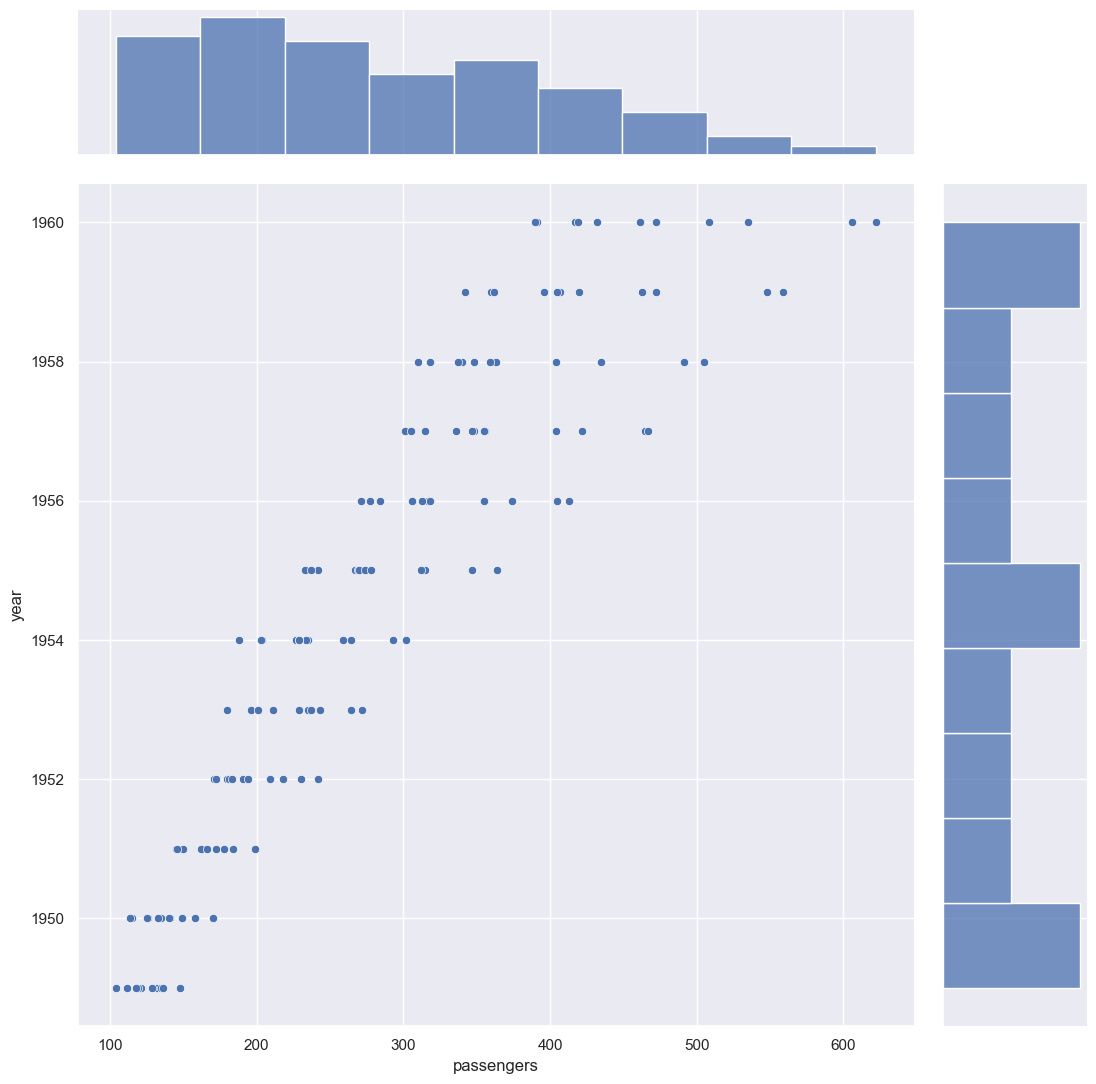

In [11]:
df = sns.load_dataset("flights")
sns.jointplot(data=df, x='passengers', y='year', height=11);

Из гистограмм видно, что данные распределены ненормаьлно. Но можно также расчитать их "нормальность" математически

In [12]:
import scipy.stats as ss

sh1, sh2 = ss.shapiro(df['passengers'])[1], ss.shapiro(df['year'])[1]
print(f"{sh1:.5f} {sh2:.5f}")
if sh1 >= 0.05 and sh2 >= 0.05:
    print('Используем коэффицент Пирсона')
    k1 = ss.pearsonr(df['passengers'], df['year'])
else:
    print('Используем коэффицент Спирмена')
    k1 = ss.spearmanr(df['passengers'], df['year'])
print(k1[0])

0.00007 0.00001
Используем коэффицент Спирмена
0.9505490437222237


#### Теперь оценим значение коэффицента связи по шкале Чеддока
| Величина коэффициента по модулю | Оценка силы связи |
| :-----------------------------: | :---------------: |
|            0.1 — 0.3            |       Слабая      |
|            0.3 — 0.5            |     Умеренная     |
|            0.5 — 0.7            |      Заметная     |
|            0.7 — 0.9            |      Высокая      |
|            0.9 — 0.99           |   Весьма высокая  |

Видно, что связь весьма высокая, что в принципе логично

### Пример 2
Проверим есть ли связь между количеством папссажиров и месяцем года

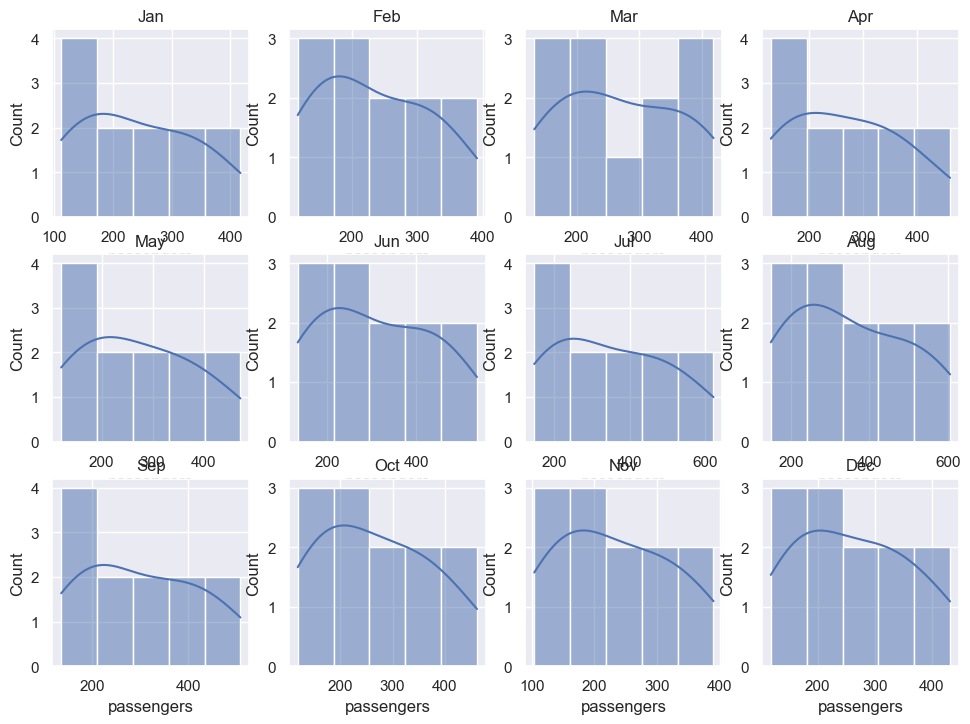

In [13]:
fig, axes = plt.subplots(3, 4)
axes = axes.flatten()
samples = []
shapiro = np.array([])
for month, ax in zip(df['month'].unique(), axes):
    samples.append(df[df['month'] == month]['passengers'])
    
    sns.histplot(samples[-1], ax=ax, kde=True)
    ax.set_title(month)
    shapiro = np.append(shapiro, ss.shapiro(samples[-1])[1])

In [14]:
if all(shapiro >= 0.05):
    print('Распределение нормальное, используем ANOVA')
    k2 = ss.f_oneway(*samples)
else:
    print('Распределение ненормальное, используем критерий Красскела-Уоллеса')
    k2 = ss.kruskal(*samples)
k2[0]

Распределение нормальное, используем ANOVA


1.4244937577524999

## P-уровень
А можем ли мы доверять полученному результату? Надо взглянуть на p-уровень

### P-уровень - статистическая значимость, вероятность того, что фактор <u>не оказывает</u> влияния на зависимую велечину

In [15]:
print('Пример 1')
print(f'p = {k1[1]}')
if k1[1] >= 0.05:
    print('P-уровень слишком большой. Нельзя сделать вывод о том, что год влияет на количество пассажиров')
else:
    print('P-уровень низкий. Можно сделать вывод о том, что год влияет на количество пассажиров')
print()
print('Пример 2')
print(f'p = {k2[1]}')
if k2[1] >= 0.05:
    print('P-уровень слишком большой. Нельзя сделать вывод о том, что месяц влияет на количество пассажиров')
else:
    print('P-уровень низкий. Можно сделать вывод о том, что месяц на количество пассажиров')

Пример 1
p = 5.4234641608993896e-74
P-уровень низкий. Можно сделать вывод о том, что год влияет на количество пассажиров

Пример 2
p = 0.1690386493084119
P-уровень слишком большой. Нельзя сделать вывод о том, что месяц влияет на количество пассажиров


Стоит понимать, что большой P-уровень не означает, что связь отсутствует полностью, он свидетельствует о том, что текущих данных не достаточно для подтверждения наличия связи. При получении высокого p следует пересмотреть гипотезу, убедится в качестве и репрезентативности выборки. Кстати, о выборках...

# Выборки

**Генеральная совокупность** $N$ — совокупность всех возможных наблюдений, относительно которых предполагается делать выводы при анализе данных.

**Выборка** $n$ — часть генеральной совокупности, которая была охвачена сбором данных.$$n = \left(\frac{z * \sigma}{H}\right) ^ 2$$ $$n = \left(\frac{z \sqrt{p(1 - p)}}{H}\right) ^ 2$$
$z$ - доверительный уровень.

| $\alpha$ (%) | 60 | 70 | 80 | 85 | 90 |  **95**  | 97 | 99 | 99.7 |
|:------------:| :---: | :---: | :---: | :---: | :---: |:--------:| :---: | :---: | :---: |
|     $z$      | 0.84 | 1.03 | 1.29 | 1.44 | 1.65 | **1.96** | 2.18 | 2.58 | 3.0  |

$p$ - уровень разброса. $$p = \frac{m}{n},$$ где $m$ - количество положительных наблюдений, при выборке $n$.

$H$ - уровень ошибки.

Если известен размер генеральной совокупности $N$, то размер выборки можно скорректирвать $$n' = \frac{(N - 1) * n}{N - n},$$ где $n$ - выборка, расчитанная по формулам выше, $n'$ - скорректированная выборка.